In [ ]:
## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
#mouse_study.head(20)

In [2]:
# Checking the number of mice.
mouseid = mouse_study['Mouse ID']
len(mouseid.value_counts())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mousetime = mouse_study[['Mouse ID','Timepoint']]
#mousetime.value_counts()

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupedata = mouse_study[mouse_study.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
dupedata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dupekeys = list(dupedata.index.values)

mousestudy_c = mouse_study.drop(index=dupekeys)
mousestudy_c.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.

mousestudy_c['Mouse ID'].value_counts()
#print(mousestudy_c.iloc[[908]])

k403    10
o287    10
j755    10
j984    10
k210    10
        ..
l872     1
h428     1
n482     1
d133     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [ ]:
## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumorvol = mousestudy_c['Tumor Volume (mm3)']
#print(st.normaltest(tumorvol))

tumor_mean = tumorvol.mean()
tumor_medi = tumorvol.median()
tumor_vari = np.var(tumorvol) #returns a different value compared to .describe()
tumor_stdv = np.std(tumorvol) #returns a different value compared to .describe()
tumor_sem = st.sem(tumorvol)

print(tumorvol.describe())

drug_types = mousestudy_c['Drug Regimen'].unique()
print(drug_types)

count    1883.000000
mean       50.449310
std         8.914637
min        22.050126
25%        45.000000
50%        48.951368
75%        56.346321
max        78.567014
Name: Tumor Volume (mm3), dtype: float64
['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [10]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_tumorvol = mousestudy_c[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen'], sort=False)
#drug_tumorvol.head()

drug_stmean = drug_tumorvol['Tumor Volume (mm3)'].mean()

drug_stmedi = drug_tumorvol['Tumor Volume (mm3)'].median()

drug_stvari = drug_tumorvol['Tumor Volume (mm3)'].var()

drug_ststdv = drug_tumorvol['Tumor Volume (mm3)'].std()

drug_stsem = drug_tumorvol['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
drug_stats = pd.DataFrame({'Mean': drug_stmean,
                          'Median': drug_stmedi,
                          'Variance': drug_stvari,
                          'Standard Deviation': drug_ststdv,
                          'SEM': drug_stsem})


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135


In [12]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_tumorvol.aggregate(['mean','median','var','std','sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

In [ ]:
## Bar and Pie Charts

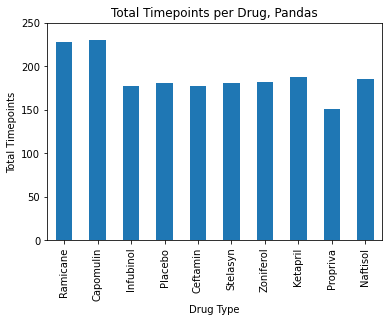

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timecount = mousestudy_c['Drug Regimen'].value_counts(sort=False)
time_pdplot = timecount.plot(kind='bar', xlabel='Drug Type', ylabel='Total Timepoints', xlim=[0,10], ylim=[0,250], title='Total Timepoints per Drug, Pandas')

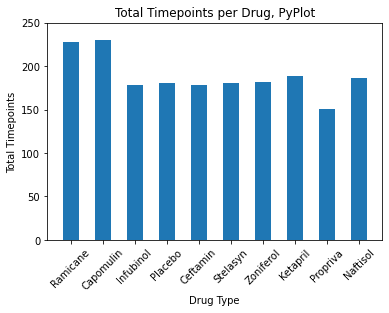

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drug_types, timecount, width=0.5)
plt.title('Total Timepoints per Drug, PyPlot')

plt.xlabel('Drug Type')
plt.ylabel('Total Timepoints')

plt.ylim(0,250)

plt.xticks(rotation=45)

plt.show()

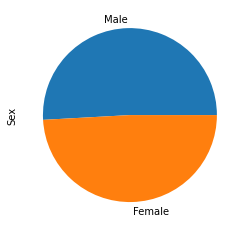

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = mousestudy_c['Sex'].value_counts()
gender_pdplot = gender.plot.pie(subplots=True)

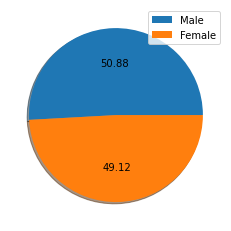

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, shadow=True, autopct='%.2f')
plt.legend(['Male', 'Female'])
plt.show()

In [ ]:
## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timedf = mousestudy_c[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint']]

finaltime = timedf.loc[timedf['Timepoint'] == 45]
finaltime = finaltime.rename(columns={'Tumor Volume (mm3)': 'Final Volume (mm3)'})
#capo_df = finaltime.loc[finaltime['Drug Regimen'] == 'Capomulin']
#rami_df = finaltime.loc[finaltime['Drug Regimen'] == 'Ramicane']
#infu_df = finaltime.loc[finaltime['Drug Regimen'] == 'Infubinol']
#ceft_df = finaltime.loc[finaltime['Drug Regimen'] == 'Ceftamin']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_plot = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ft_quart = finaltime['Final Volume (mm3)'].quantile([0.25, 0.5, 0.75])

qt1 = ft_quart[0.25]
qt3 = ft_quart[0.75]

tumor_iqr = qt3 - qt1

# Locate the rows which contain mice on each drug and get the tumor volumes
capo_df = finaltime.loc[finaltime['Drug Regimen'] == 'Capomulin']
rami_df = finaltime.loc[finaltime['Drug Regimen'] == 'Ramicane']
infu_df = finaltime.loc[finaltime['Drug Regimen'] == 'Infubinol']
ceft_df = finaltime.loc[finaltime['Drug Regimen'] == 'Ceftamin']

# add subset
    
# Determine outliers using upper and lower bounds
bound_low = qt1 - (tumor_iqr * 1.5)
print(bound_low)
bound_upp = qt3 + (tumor_iqr * 1.5)   
print(bound_upp)

-1.6595831850000096
111.18822347500002


In [52]:
capo_df.head()

,Mouse ID,Drug Regimen,Final Volume (mm3),Timepoint
19,s185,Capomulin,23.343598,45
29,x401,Capomulin,28.484033,45
39,m601,Capomulin,28.430964,45
104,u364,Capomulin,31.023923,45
124,y793,Capomulin,31.896238,45


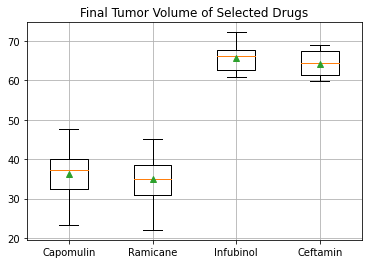

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [capo_df['Final Volume (mm3)'], rami_df['Final Volume (mm3)'], infu_df['Final Volume (mm3)'], ceft_df['Final Volume (mm3)']]
plt.boxplot(data, labels=treatments, showmeans=True)
plt.title('Final Tumor Volume of Selected Drugs')
plt.grid()
plt.show()

In [ ]:
## Line and Scatter Plots

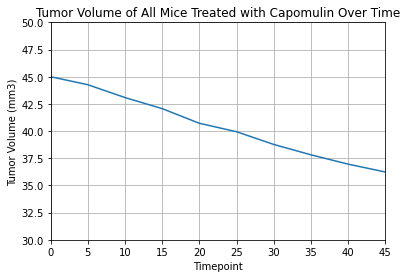

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_plt = timedf.loc[timedf['Drug Regimen'] == 'Capomulin']
capo_plt = capo_plt[['Tumor Volume (mm3)', 'Timepoint']].groupby(['Timepoint']).mean()

plt.plot(capo_plt)

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.xlim(0, 45)
plt.ylim(30, 50)

plt.grid()
plt.title('Tumor Volume of All Mice Treated with Capomulin Over Time')

plt.show()

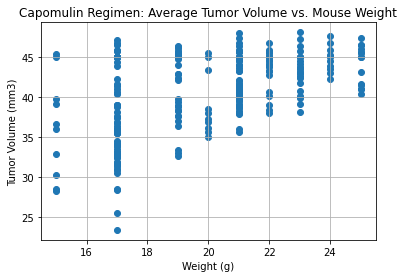

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_w = mousestudy_c[['Drug Regimen', 'Weight (g)', 'Tumor Volume (mm3)']]
capo_w = capo_w.loc[capo_w['Drug Regimen'] == 'Capomulin']
#capo_w = capo_w[['Tumor Volume (mm3)', 'Weight (g)']].groupby(['Weight (g)']).mean()

plt.scatter(capo_w['Weight (g)'], capo_w['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.title('Capomulin Regimen: Average Tumor Volume vs. Mouse Weight')
plt.grid()

plt.show()

In [ ]:
## Correlation and Regression

9.605446629502825e-18


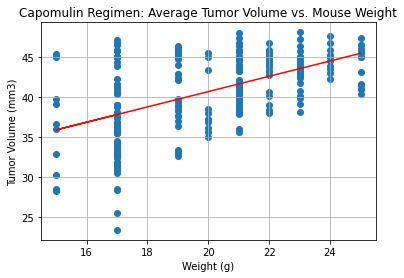

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
coeff = st.pearsonr(capo_w['Weight (g)'], capo_w['Tumor Volume (mm3)'])
print(coeff[1])

linreg = st.linregress(capo_w['Weight (g)'], capo_w['Tumor Volume (mm3)'])

plt.scatter(capo_w['Weight (g)'], capo_w['Tumor Volume (mm3)'])
plt.plot(capo_w['Weight (g)'], linreg.intercept + linreg.slope*capo_w['Weight (g)'], 'r')

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.title('Capomulin Regimen: Average Tumor Volume vs. Mouse Weight')
plt.grid()

plt.show()